<a href="https://colab.research.google.com/github/Imanebouayad/Detecting-COVID-19-using-classification-with-NN/blob/main/Detecting_COVID_19_in_X_ray_images_using_NN_for_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```

# project ML¶   
## - Overview of the Problem set ##

**Problem Statement**: You are given a dataset ("datset") containing:
    - a training set of m_train=444 images labeled as covid (y=1) or normal (y=0)
    - a test set of m_test=111 images labeled as covid or normal
    - each image is of shape (64, 64, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = 64) and (width = 64).

we will build a simple image-recognition algorithm that can correctly classify pictures as covid or normal.

Let's get more familiar with the dataset

## Importing Models¶

In [ ]:
import cv2
import argparse
import os
from imutils import paths
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import scipy.misc
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

## loading & standration of the data

In [ ]:
imagePaths = list(paths.list_images("/content/drive/My Drive/dataset"))
data = []
labels = []
# loop over the image paths
for imagePath in imagePaths:
    # extract the class label from the filename
    label = imagePath.split(os.path.sep)[-2]
    # load the image, swap color channels, and resize it to be a fixed
    # 64x64 pixels while ignoring aspect ratio
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (64,64))
    # update the data and labels lists, respectively
    data.append(image)
    labels.append(label)
# convert the data  to NumPy arrays while scaling the pixel
# intensities to the range [0, 1]
data = np.array(data) / 255.0

## showing the data structure

In [ ]:
print(data[0].shape)
print(data.shape)
data

In [ ]:
labels=labels[::-1]
print(labels)

['covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 

## Transforming the label values to categorical values (0,1) & partition of the data

In [ ]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
#labels = to_categorical(labels)
# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels,test_size=0.2, stratify=labels, random_state=42)

ValueError: ignored

In [ ]:
m_train = trainX.shape[0]
m_test =  testX.shape[0]
num_px = trainX.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("trainX shape: " + str(trainX.shape))
print ("trainY shape: " + str(trainY.shape))
print ("testX shape: " + str(testX.shape))
print ("testY shape: " + str(testY.shape))

NameError: ignored

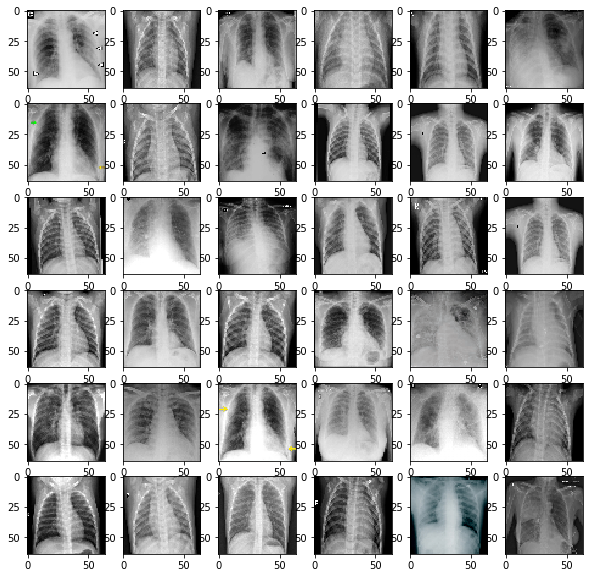

In [ ]:
plt.figure(figsize=(10,10)) # specifying the overall grid size
j=0
for i in range(36):
    plt.subplot(6,6,i+1)    # the number of images in the grid is 6*6 (36)
    plt.imshow(trainX[10 * i + j])
    j=j+1

plt.show()

In [ ]:
# Reshape the training and test examples

trainX=trainX.reshape(trainX.shape[0], -1).T #trainX.reshape(trainX.shape[1]*trainX.shape[2]*trainX.shape[3],trainX.shape[0])
testX= testX.reshape(testX.shape[0], -1).T #testX.reshape(testX.shape[1]*testX.shape[2]*testX.shape[3],testX.shape[0])
trainY=trainY.T
testY=testY.T
print ("trainX shape after reshaping: " + str(trainX.shape))
print ("trainY shape after reshaping: " + str(trainY.shape))
print ("testX shape after  reshaping: " + str(testX.shape))
print ("testY shape after  reshaping: " + str(testY.shape)) 


trainX shape after reshaping: (12288, 444)
trainY shape after reshaping: (1, 444)
testX shape after  reshaping: (12288, 111)
testY shape after  reshaping: (1, 111)


- the work for the next Meeting inshallah

1. Define the model structure (such as number of input features =64\*64\*3 output 1 units (0,1) )
2. Initialize the model's parameters
3. Loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)
    - using  the the parameters* to predicte the result 0,1



# Initialize the model's parameters
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
    b1 -- bias vector of shape (layers_dims[1], 1)
    ...
    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
    bL -- bias vector of shape (layers_dims[L], 1)
---



In [ ]:
# He insialization
def initialize_parameters(layers_dims):
  
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims) - 1 # integer representing the number of layers
     
    for l in range(1, L + 1):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1])*np.sqrt(2/layers_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l],1))
        
        
    return parameters

# forward propagation
    1.def linear_forward(A, W, b): Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python dictionary containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    2.def linear_activation_forward(A_prev, W, b, activation): Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python dictionary containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently


In [ ]:

def linear_forward(A, W, b):
    
    Z = W.dot(A) + b
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

def linear_activation_forward(A_prev, W, b, activation):
    
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache


    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_relu_forward() (there are L-1 of them, indexed from 0 to L-2)
                the cache of linear_sigmoid_forward() (there is one, indexed L-1)

In [ ]:
def L_model_forward(X, parameters):
    
    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "relu")
        caches.append(cache)
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "sigmoid")
    caches.append(cache)
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

# Activation function



In [ ]:
def sigmoid(Z):
    """
    Implements the sigmoid activation in numpy
    
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """
    
    A = 1/(1+np.exp(-Z))
    cache = Z
    
    return A, cache

def relu(Z):
    """
    Implement the RELU function.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """
    
    A = np.maximum(0,Z)
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache

def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ


# compute cost function

Arguments:
* AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
* Y -- true "label" vector (for example: containing 0 if normal, 1 if covid), shape (1, number of examples)

* Returns:
      cost -- cross-entropy cost



In [ ]:
def compute_cost(AL, Y):
    
    m = Y.shape[1]

    # Compute loss from aL and y.
    cost = (1./m) * (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    #ssert(cost.shape == ())
    
    return cost

# backward_propagation

In [ ]:
def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = 1./m * np.dot(dZ,A_prev.T)
    db = 1./m * np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T,dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if normal, 1 if covid)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (there are (L-1) or them, indexes from 0 to L-2)
                the cache of linear_activation_forward() with "sigmoid" (there is one, index L-1)
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 

In [ ]:
def L_model_backward(AL, Y, caches):
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "AL, Y, caches". Outputs: "grads["dAL"], grads["dWL"], grads["dbL"]
    current_cache = caches[L-1]
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")
    
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 2)], current_cache, activation = "relu")
        grads["dA" + str(l + 1)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

# Update parameters using gradient descent
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of n_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters['W' + str(i)] = ... 
                  parameters['b' + str(i)] = ...

In [ ]:
def update_parameters(parameters, grads, learning_rate):
  
    L = len(parameters) // 2 # number of layers in the neural networks

    # Update rule for each parameter
    for k in range(L):
        parameters["W" + str(k+1)] = parameters["W" + str(k+1)] - learning_rate * grads["dW" + str(k+1)]
        parameters["b" + str(k+1)] = parameters["b" + str(k+1)] - learning_rate * grads["db" + str(k+1)]
        
    return parameters

###Model
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if normal, 1 if covid), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict

In [ ]:

def L_layer_model(X, Y, layers_dims, learning_rate = 0.001, num_iterations = 4000,print_cost=False):
    

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization. (≈ 1 line of code)

    parameters = initialize_parameters(layers_dims)
    
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        
        AL, caches = L_model_forward(X, parameters)
        
        
        # Compute cost.
       
        cost = compute_cost(AL, Y)
       
    
        # Backward propagation.
        
        grads = L_model_backward(AL, Y, caches)
       
 
        # Update parameters.
        
        parameters = update_parameters(parameters, grads, learning_rate)
        
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

# This function is used to predict the results of a  n-layer neural network
    def predict(X, y, parameters):
    
    This function is used to predict the results of a  L-layer neural network.
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X

In [ ]:
def predict(X, y, parameters):
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
    # Forward propagation
    probas, caches = L_model_forward(X, parameters)

    
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    #print results
    #print ("predictions: " + str(p))
    #print ("true labels: " + str(y))
    print("Accuracy: "  + str(np.sum((p == y)/m)))
        
    return p


Cost after iteration 0: 0.693089
Cost after iteration 100: 0.632376
Cost after iteration 200: 0.567568
Cost after iteration 300: 0.516036
Cost after iteration 400: 0.484109
Cost after iteration 500: 0.461154
Cost after iteration 600: 0.443869
Cost after iteration 700: 0.428657
Cost after iteration 800: 0.415581
Cost after iteration 900: 0.403999
Cost after iteration 1000: 0.393855
Cost after iteration 1100: 0.384476
Cost after iteration 1200: 0.375402
Cost after iteration 1300: 0.367005
Cost after iteration 1400: 0.359181
Cost after iteration 1500: 0.351667
Cost after iteration 1600: 0.344636
Cost after iteration 1700: 0.337646
Cost after iteration 1800: 0.330552
Cost after iteration 1900: 0.323739
Cost after iteration 2000: 0.317368
Cost after iteration 2100: 0.311466
Cost after iteration 2200: 0.305950
Cost after iteration 2300: 0.300621
Cost after iteration 2400: 0.295516


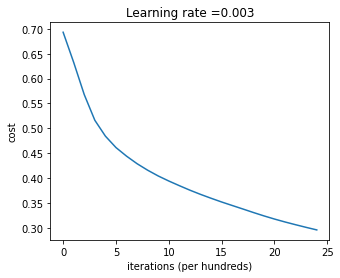

train 
Accuracy: 0.9099099099099102
test 
Accuracy: 0.873873873873874


In [ ]:
layers_dims =[12288, 20, 6, 3, 1]
parameters = L_layer_model(trainX,trainY, layers_dims,learning_rate=0.003,num_iterations = 2500, print_cost = True)
print("train ")
pred_train = predict(trainX, trainY, parameters)
print("test ")
pred_test = predict(testX,testY, parameters)
      
         

In [ ]:
pred_train = predict(trainX, trainY, parameters)

Accuracy: 0.9099099099099102


In [ ]:
pred_test = predict(testX,testY, parameters)

Accuracy: 0.873873873873874


# Mislabeled images

4-layer neural network has better performance (87%) but the model is infected by higher variance.

In [ ]:
def print_mislabeled_images(classes, X, y, p):
    """
    Plots images where predictions and truth were different.
    X -- dataset
    y -- true labels
    p -- predictions
    """
    a = p + y
    mislabeled_indices = np.asarray(np.where(a == 1))
    plt.rcParams['figure.figsize'] = (40.0, 40.0) # set default size of plots
    num_images = len(mislabeled_indices[0])
    for i in range(num_images):
        index = mislabeled_indices[1][i]
        
        plt.subplot(2, num_images, i + 1)
        plt.imshow(X[:,index].reshape(64,64,3), interpolation='nearest')
        plt.axis('off')
        plt.title("Prediction: " + classes[int(p[0,index])].decode("utf-8") + " \n Class: " + classes[y[0,index]].decode("utf-8"))


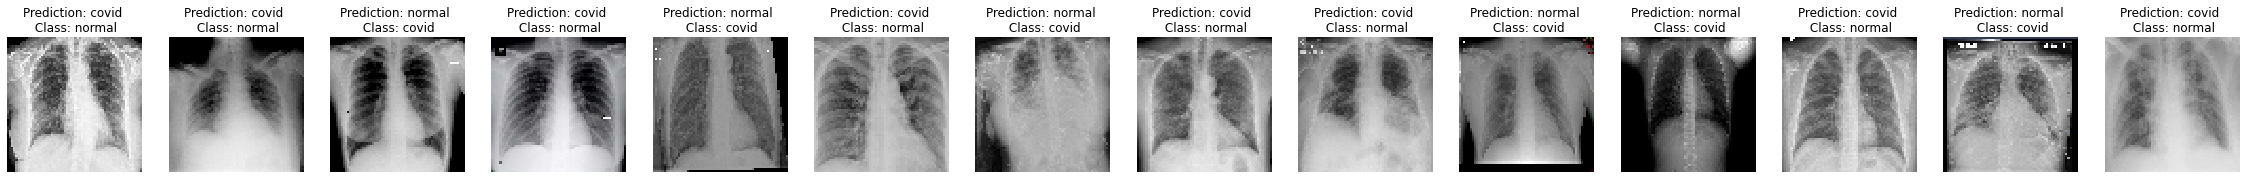

In [ ]:
classes=np.array([b'normal', b'covid'], dtype='|S7')
print_mislabeled_images(classes, testX, testY,pred_test)

# Test with your own image

Accuracy: 1.0
y = 1.0, your L-layer model predicts a "covid" picture.


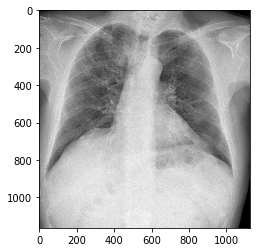

In [ ]:
my_image = "covid-19-infection-exclusive-gastrointestinal-symptoms-pa.png" # change this to the name of your image file 
my_label_y = [1] # the true class of your image (1 -> covid, 0 -> normal)
fname = "/content/drive/My Drive/dataset/covid/" + my_image
image = np.array(cv2.imread(fname))
#my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((num_px*num_px*3,1))
my_image= cv2.resize(image,(64,64)).reshape((64*64*3,1))
my_image = my_image/255.
my_predicted_image = predict(my_image, my_label_y, parameters)

plt.imshow(image)
print ("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")